# Creating good looking figures

After working some times on a project, comes the time to share our findings with other people. This usually involves creating figures. 

A typical figure will contains several panels, each telling its own story.

The notebooks explains how to create complex figures in python. Our aim will be to produce a publication-quality figure.

Most of the programming content in this notebook comes from https://matplotlib.org/stable/tutorials/introductory/usage.html


# Rules to have consistent figures

1. Always put a label on the x- and y-axis.
2. Keep the font size constant across your figure panels.
3. Keep your color scheme constant across your figure panels.
4. Avoid changing the meaning of a color across panels of a figure.
5. Avoid color schemes that requires discrimination between red and green. [Color blindness](https://en.wikipedia.org/wiki/Color_blindness) affects up to 1 in 12 males (8%) and 1 in 200 females (0.5%).
6. In a multi-plot figure, align the x-axes and y-axis of plots that are in the same row or column. This principle applies to numbers and labels along the x- and y-axis.

## Suggestions

1. Only the first letter of label is capitalized. 
2. You don't need 4 axes on most plots.
3. Add a letter to identify figure panels or groups of figure panels. 
 

## Terminology in academia

* Figure: Image with contains one or several plots.
* Figure panel: One plot in a multi-plot figure. Usually identified by a letter.

## Matplotlib terminology

The terminology used in matplotlib is different. You have to learn this terminology to control how your figures look like.

### Figure

The whole figure. The Figure keeps track of all the child Axes and even nested subfigures.

### Axes

An Axes is an Artist attached to a Figure that contains a region for plotting data, and usually includes two (or three in the case of 3D) Axis objects (be aware of the difference between Axes and Axis) that provide ticks and tick labels to provide scales for the data in the Axes. Each Axes also has a title (set via set_title()), an x-label (set via set_xlabel()), and a y-label set via set_ylabel()).

An Axes is a group of 'special' Artists (titles, figure legends, colorbars, etc).

The Axes class and its member functions are the primary entry point to working with the OOP interface, and have most of the plotting methods defined on them (e.g. ax.plot(), shown above, uses the plot method)

An Axes is not the same thing as an axis.

### Axis

The x- and y-axis to display data within an axes.

### Artist

Basically, everything visible on the Figure is an Artist (even Figure, Axes, and Axis objects). This includes Text objects, Line2D objects, collections objects, Patch objects, etc. When the Figure is rendered, all of the Artists are drawn to the canvas. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.

## Matplotlib figure anatomy

Matplotlib graphs your data on **Figures** (e.g., windows, Jupyter widgets, etc.), each of which can contain one or more **Axes**, an area where points can be specified in terms of x-y coordinates (or theta-r in a polar plot, x-y-z in a 3D plot, etc). 

<img src="../images/figure_anatomy.webp" width=800>

The simplest way of creating a Figure with an Axes is using **pyplot.subplots**. We can then use **Axes.plot** to draw some data on the Axes.

## Types of inputs to plotting functions

Plotting functions expect **numpy.array** as input, or objects that can be passed to numpy.asarray. 

Classes that are similar to arrays ('array-like') such as pandas data objects and numpy.matrix may or may not work as intended. 

Common convention is to convert these to numpy.array objects prior to plotting. For example, to convert a numpy.matrix.

We create one 1D numpy.array that contains the speed of an animal and three 1D numpy.arrays containing the firing rate of speed cells.

In [149]:
import matplotlib.pyplot as plt
import numpy as np

runningSpeed = np.random.normal(loc=15,scale=10,size=100).clip(min=0)

firingRateNeuron1 = (runningSpeed + 10 + np.random.normal(loc=0,scale=5,size=100)).clip(min=0)
firingRateNeuron2 = (runningSpeed + 5 + np.random.normal(loc=0,scale=5,size=100)).clip(min=0)
firingRateNeuron3 = (runningSpeed + 20 + np.random.normal(loc=0,scale=5,size=100)).clip(min=0)

## Matplotlib 2 main interfaces

* The first is an object-oriented (OO) interface. In this case, we utilize an instance of axes.Axes in order to render visualizations on an instance of figure.Figure.
* The second is based on MATLAB and uses a state-based interface. This is encapsulated in the pyplot module. See the pyplot tutorials for a more in-depth look at the pyplot interface.

Use the second one (e.g., plt.plot() only while data exploration. When preparing figures, working with the axes will give you a better control.

We will only use the object-oriented interface.

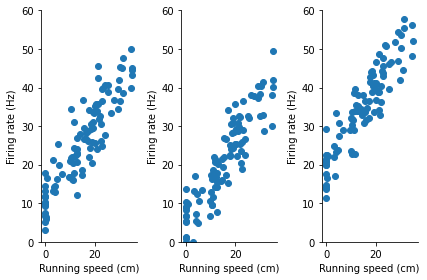

In [150]:
fig,axes = plt.subplots(nrows=1, ncols=3) # we use pyplot.subplots to get a figure and axes.

# neuron 1
axes[0].scatter(runningSpeed,firingRateNeuron1)
axes[0].set_xlabel("Running speed (cm)")
axes[0].set_ylabel("Firing rate (Hz)")
axes[0].set_ylim(0,60)
for spine in ['top', 'right']:
    axes[0].spines[spine].set_visible(False)

# neuron 2
axes[1].scatter(runningSpeed,firingRateNeuron2)
axes[1].set_xlabel("Running speed (cm)")
axes[1].set_ylabel("Firing rate (Hz)")
axes[1].set_ylim(0,60)
for spine in ['top', 'right']:
    axes[1].spines[spine].set_visible(False)
    
# neuron 3
axes[2].scatter(runningSpeed,firingRateNeuron3)
axes[2].set_xlabel("Running speed (cm)")
axes[2].set_ylabel("Firing rate (Hz)")
axes[2].set_ylim(0,60)
for spine in ['top', 'right']:
    axes[2].spines[spine].set_visible(False)
    
# make sure the labels, ticks and 
fig.tight_layout() 

plt.show()

## Making helper functions

When building complex figures with repetitive axes, use helper functions to generate one axes. A call to the function will set the draw on the axes.

One argument of the helper function is an axes on which the data will be drawn. The function has control how the data is plotted.

In [151]:
def speedCellScatter(ax,speed,firingRate, title= ""):
    """
    Function to generate a scatter plot for a speed cell
    Arguments:
    ax: axes of a figure
    speed: running speed of the animal as a 1D numpy array
    firingRate: firing rate of the neuron as a 1D numpy array
    """
    ax.scatter(speed,firingRate, facecolor='C0', edgecolor='k')
    ax.set_xlabel("Running speed (cm)")
    ax.set_ylabel("Firing rate (Hz)")
    ax.set_ylim(0,60)
    ax.set_yticks(np.linspace(0,60,7))  # note that we don't need to specify labels
    ax.set_title(title)
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

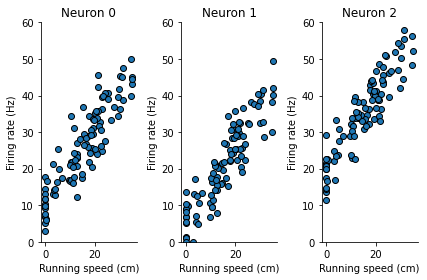

In [152]:
fig,axes = plt.subplots(nrows=1, ncols=3) # we use pyplot.subplots to get a figure and axes.

for i, rate in enumerate([firingRateNeuron1,firingRateNeuron2,firingRateNeuron3]):
    speedCellScatter(ax=axes[i],speed=runningSpeed,firingRate= rate,title="Neuron {}".format(i))

fig.tight_layout() 
plt.show()

Use functions reduce the amount of code you need to write. The additional benefit is that when you want to change how you plot speed cells, you only need to edit one function.

Using helper functions also hides the details of how the plots are made when trying to assemble a complex figure.

# Gridspec

Gridspec is the most flexible object to control how the different axes will be placed in your figure. 

**GridSpec** defines a (possibly non-uniform) grid of cells. Indexing into the GridSpec returns a **SubplotSpec** that covers one or more grid cells, and can be used to specify the location of an Axes.

`mySubplotSpec = myGridSpec[0]`

Here are a few examples to understand how GridSpec and SubplotSpec work.


In [180]:
def annotate_axes(ax, text, fontsize=16):
    """
    Function to put text in the middle of an axes
    """
    ax.text(0.5, 0.5, text, transform=ax.transAxes,
            ha="center", va="center", fontsize=fontsize, color="darkgrey")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    

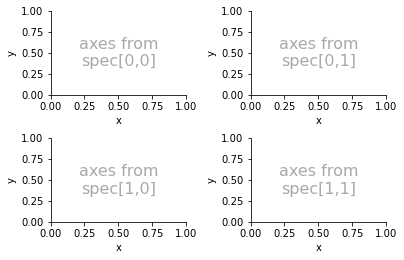

In [181]:
fig = plt.figure(figsize=(5.5, 3.5), constrained_layout=True) # create a figure
spec = fig.add_gridspec(ncols=2, nrows=2) # create a GridSpec object to a figure

ax = fig.add_subplot(spec[0, 0]) # add an axes to the figure
annotate_axes(ax, 'axes from\nspec[0,0]')

ax = fig.add_subplot(spec[0, 1])
annotate_axes(ax, 'axes from\nspec[0,1]')

ax = fig.add_subplot(spec[1, 0])
annotate_axes(ax, 'axes from\nspec[1,0]')

ax = fig.add_subplot(spec[1, 1])
annotate_axes(ax, 'axes from\nspec[1,1]')

plt.show()

There are 3 key steps to understand.

1. Use the `matplotlib.figure.Figure()` or `matplotlib.pyplot.figure()` function to create a `matplotlib.figure.Figure` object.
2. Use `matplotlib.figure.Figure.add_gridspec()` method to create a `matplotlib.gridspec.GridSpec` object.
3. Use `matplotlib.figure.Figure.add_subplot()` to get an `matplotlib.axes._subplots.AxesSubplot`.

We will go through these 3 steps in turn.

## Creating a matplotlib.figure.Figure

The main variable to set here is the size of the figure. It is important to keep the size of your Axes constant across figures.

You need to know how many Axes you want on your figure, and how many rows and columns of Axes.

It is a good idea to keep the size of indivisual axes constant within your figure. 
I am using a function that returns the default Axes size. 

In [182]:
def defaultAxesSize():
    """
    Use to keep the size of axes similar across figures
    
    returns the row and column size 
    """
    return (2,2)

Let's say we want to create a figure with 3 rows and 2 columns.

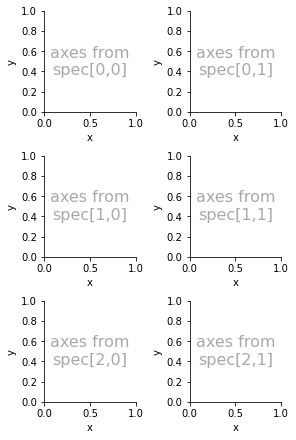

In [183]:
nRows=3
nCols=2
axesRowSize,axesColSize = defaultAxesSize() # so you always use the same size, but don't have to remember it.
fig = plt.figure(figsize=(nCols*axesColSize,nRows*axesRowSize), constrained_layout=True) # figsize = (width,height)
spec = fig.add_gridspec(nrows=nRows,ncols=nCols) # create a GridSpec object to a figure
for i in range(nRows):
    for j in range(nCols):
        ax = fig.add_subplot(spec[i,j])
        annotate_axes(ax, 'axes from\nspec[{},{}]'.format(i,j))

## Creating a matplotlib.gridspec.GridSpec

You can use two functions: 
1. `matplotlib.figure.Figure.add_gridspec()`
2. `matplotlib.gridspec.GridSpec()`

Under the hood, `matplotlib.figure.Figure.add_gridspec()` calls `matplotlib.gridspec.GridSpec()` and keyword arguments are passed to matplotlib.gridspec.GridSpec(). 

To know the possible arguments, try `?matplotlib.gridspec.GridSpec`

If you want to work with `matplotlib.gridspec.GridSpec()` directly, you will need to import this module.

In [184]:
import matplotlib.gridspec as gridspec

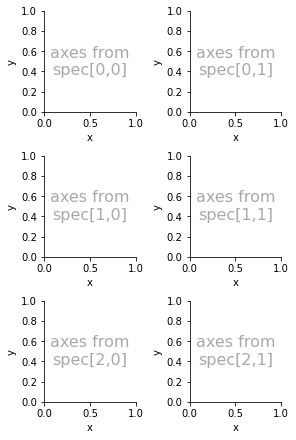

In [185]:
nRows=3
nCols=2
axesRowSize,axesColSize = defaultAxesSize() # so you always use the same size, but don't have to remember it.
fig = plt.figure(figsize=(nCols*axesColSize,nRows*axesRowSize), constrained_layout=True) # figsize = (width,height)

spec = gridspec.GridSpec(nrows=nRows,ncols=nCols, figure = fig) # create a GridSpec object to a figure
for i in range(nRows):
    for j in range(nCols):
        ax = fig.add_subplot(spec[i,j])
        annotate_axes(ax, 'axes from\nspec[{},{}]'.format(i,j))

### Adjusting the spacing between Axes in a GridSpec object


One useful feature of `gridspec.GridSpec()` is that you can set the relative height and width of the rows and columns.

Let's say that we would like to make a 2 x 2 grid of axes, but we would like to increase the space between the first and second rows of plots. We can do this by creating an extra row in the GridSpec object that you use to create space between Axes.

Note: If you are not using `constrained_layout = True` when creating the figure, you can also use the arguments wspace and hspace. But with `constrained_layout=True`, setting wspace and hspace does not have the expected effects.

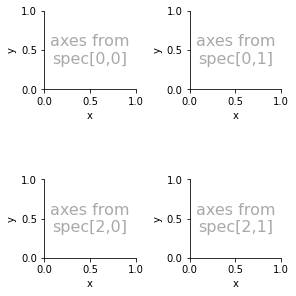

In [186]:
nRows=2
nCols=2
axesRowSize,axesColSize = defaultAxesSize() # so you always use the same size, but don't have to remember it.
fig = plt.figure(figsize=(nCols*axesColSize,nRows*axesRowSize), constrained_layout=True) # figsize = (width,height)

spec = gridspec.GridSpec(nrows=nRows+1,ncols=nCols, figure = fig,height_ratios=[1,0.5,1]) # create a GridSpec object to a figure

for i in [0,2]:
    for j in range(nCols):
        ax = fig.add_subplot(spec[i,j])
        annotate_axes(ax, 'axes from\nspec[{},{}]'.format(i,j))

Here we have more space between the 2 rows but the height of the panels have been reduced. 

You can increase the height of the figure to take into account the extra space between the two rows.

Since the extra row has 0.5 the size of a normal row, we can add this to the figure height.


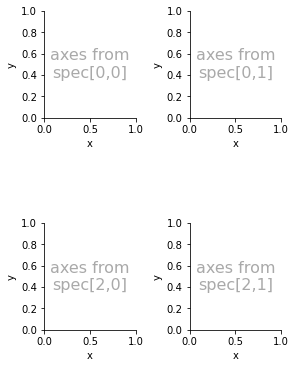

In [187]:
nRows=2
nCols=2
axesRowSize,axesColSize = defaultAxesSize() # so you always use the same size, but don't have to remember it.
extraHeight= axesRowSize * 0.5

fig = plt.figure(figsize=(nCols*axesColSize,nRows*axesRowSize+extraHeight), constrained_layout=True) # figsize = (width,height)

spec = gridspec.GridSpec(nrows=nRows+1,ncols=nCols, figure = fig,height_ratios=[1,0.5,1]) # create a GridSpec object to a figure

for i in [0,2]:
    for j in range(nCols):
        ax = fig.add_subplot(spec[i,j])
        annotate_axes(ax, 'axes from\nspec[{},{}]'.format(i,j))

## Creating a matplotlib.axes._subplots.AxesSubplot

To be able to create a Axes according to your GridSpec, you call the function `matplotlib.figure.Figure.add_subplot()`.

You need to give a `SubplotSpec` to the `add_subplot()` function so that it knows where the axes goes on the figure.
You can get a `SubplotSpec` by indexing your GridSpec object. For example, `spec[0]`.

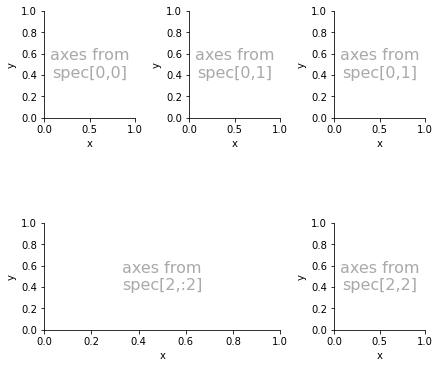

In [188]:
nRows=2
nCols=3
axesRowSize,axesColSize = defaultAxesSize() # so you always use the same size, but don't have to remember it.
extraHeight= axesRowSize * 0.5

fig = plt.figure(figsize=(nCols*axesColSize,nRows*axesRowSize+extraHeight), constrained_layout=True) # figsize = (width,height)

spec = gridspec.GridSpec(nrows=nRows+1,ncols=nCols, figure = fig,height_ratios=[1,0.5,1]) # create a GridSpec object to a figure

ax = fig.add_subplot(spec[0,0])
annotate_axes(ax, 'axes from\nspec[0,0]')

ax = fig.add_subplot(spec[0,1])
annotate_axes(ax, 'axes from\nspec[0,1]')

ax = fig.add_subplot(spec[0,2])
annotate_axes(ax, 'axes from\nspec[0,1]')


ax = fig.add_subplot(spec[2,:2])
annotate_axes(ax, 'axes from\nspec[2,:2]')

ax = fig.add_subplot(spec[2,2])
annotate_axes(ax, 'axes from\nspec[2,2]')




When getting a `SubplotSpec` from the `GridSpec`, you index it like a numpy.array. This means that you can get as many cell of your grid as you want. 

This method will allow you to create axes that are 2x or 3x as large as the standard Axes size.

## Nested layouts within a figure

There are situation where using a single grid does not work well. For example, when you want to display Axes with a size that is not a multiple of the standard Axes size.

Imagine you want to have a figure with 2 rows of Axes. In the first row you would like to have 2 Axes and in the second row you want 3 Axes. Here is how you could do this.

You might try something like this.

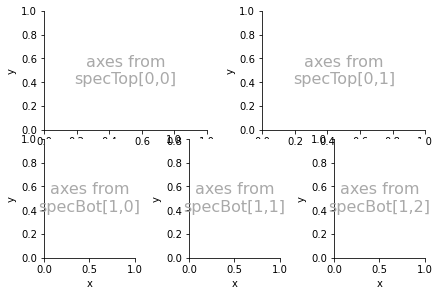

In [260]:
nRows=2
nCols=3
axesRowSize,axesColSize = defaultAxesSize() # so you always use the same size, but don't have to remember it.

fig = plt.figure(figsize=(nCols*axesColSize,nRows*axesRowSize), constrained_layout=True) # figsize = (width,height)

# this will not work with constrained_layout...
specTop = gridspec.GridSpec(nrows=nRows,ncols=2, figure = fig) # create a GridSpec object to a figure
specBot = gridspec.GridSpec(nrows=nRows,ncols=3, figure = fig) # create a GridSpec object to a figure


ax = fig.add_subplot(specTop[0,0])
annotate_axes(ax, 'axes from\nspecTop[0,0]')

ax = fig.add_subplot(specTop[0,1])
annotate_axes(ax, 'axes from\nspecTop[0,1]')

ax = fig.add_subplot(specBot[1,0])
annotate_axes(ax, 'axes from\nspecBot[1,0]')

ax = fig.add_subplot(specBot[1,1])
annotate_axes(ax, 'axes from\nspecBot[1,1]')

ax = fig.add_subplot(specBot[1,2])
annotate_axes(ax, 'axes from\nspecBot[1,2]')


The main problem here is that the contrained_layout does not work anymore.

One solution is to create a hierarchy using `gridspec.GridSpecFromSubplotSpec()`

Remember that when you index a GridSpec object, you get a SubplotSpec.

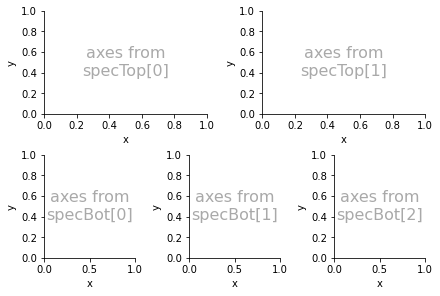

In [262]:
nRows=2
nCols=3
axesRowSize,axesColSize = defaultAxesSize() # so you always use the same size, but don't have to remember it.

fig = plt.figure(figsize=(nCols*axesColSize,nRows*axesRowSize), constrained_layout=True) # figsize = (width,height)

spec = gridspec.GridSpec(nrows=nRows,ncols=1, figure = fig) # create a GridSpec object to a figure
specTop = gridspec.GridSpecFromSubplotSpec(nrows=1,ncols=2,subplot_spec=spec[0])
specBot = gridspec.GridSpecFromSubplotSpec(nrows=1,ncols=3,subplot_spec=spec[1])

ax = fig.add_subplot(specTop[0])
annotate_axes(ax, 'axes from\nspecTop[0]')

ax = fig.add_subplot(specTop[1])
annotate_axes(ax, 'axes from\nspecTop[1]')

ax = fig.add_subplot(specBot[0])
annotate_axes(ax, 'axes from\nspecBot[0]')

ax = fig.add_subplot(specBot[1])
annotate_axes(ax, 'axes from\nspecBot[1]')

ax = fig.add_subplot(specBot[2])
annotate_axes(ax, 'axes from\nspecBot[2]')

You can also set the width and height ratio when creating a GridSpec from a SubplotSpec.

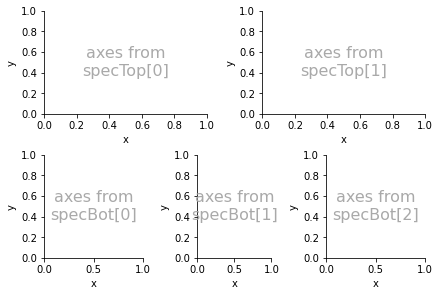

In [263]:
nRows=2
nCols=3
axesRowSize,axesColSize = defaultAxesSize() # so you always use the same size, but don't have to remember it.
fig = plt.figure(figsize=(nCols*axesColSize,nRows*axesRowSize), constrained_layout=True) # figsize = (width,height)

spec = gridspec.GridSpec(nrows=nRows,ncols=1, figure = fig) # create a GridSpec object to a figure
specTop = gridspec.GridSpecFromSubplotSpec(nrows=1,ncols=2,subplot_spec=spec[0])
specBot = gridspec.GridSpecFromSubplotSpec(nrows=1,ncols=3,subplot_spec=spec[1],width_ratios=[1,0.75,1])

ax = fig.add_subplot(specTop[0])
annotate_axes(ax, 'axes from\nspecTop[0]')

ax = fig.add_subplot(specTop[1])
annotate_axes(ax, 'axes from\nspecTop[1]')

ax = fig.add_subplot(specBot[0])
annotate_axes(ax, 'axes from\nspecBot[0]')

ax = fig.add_subplot(specBot[1])
annotate_axes(ax, 'axes from\nspecBot[1]')

ax = fig.add_subplot(specBot[2])
annotate_axes(ax, 'axes from\nspecBot[2]')

Adding letters to identify axes.

## Helper functions taking GridSpec as argument

You can create helper function that will add one or several Axes within a GridSpec. 

For example, if you want to show several matrices, you could write a function that takes a GridSpec as argument.


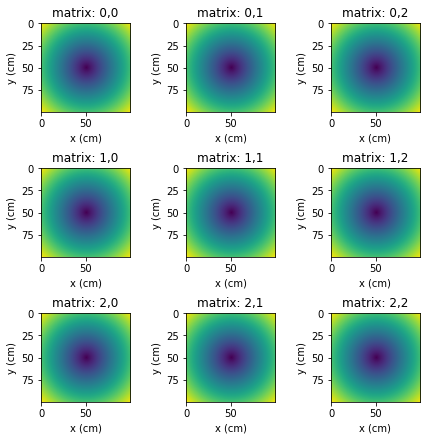

In [274]:
def showSeveralMatrices(spec,fig):
    """
    Function to plot 3 x 3 examples of firing rate maps
    
    Argument
    spec: GridSpec object that is a 1x1 grid
    fig: figure on which to draw
    """
    gs = gridspec.GridSpecFromSubplotSpec(nrows=3,ncols=3,subplot_spec=spec[0])
    for i in range(3):
        for j in range(3):
            ax = fig.add_subplot(gs[i,j])
            plotOneMatrix(ax,title="matrix: {},{}".format(i,j))

def plotOneMatrix(ax,title=""):
    """
    Function to generate a matrix and plot the results on an axes.
    
    Artument
    ax: Axes
    """
    points = np.arange(-5,5,0.1)
    xs,ys = np.meshgrid(points,points)
    z = np.sqrt(xs**2 + ys**2)
    ax.imshow(z)
    ax.set_xlabel("x (cm)")
    ax.set_ylabel("y (cm)")
    ax.set_title(title)
    
nRows=3
nCols=3
axesRowSize,axesColSize = defaultAxesSize() # so you always use the same size, but don't have to remember it.
fig = plt.figure(figsize=(nCols*axesColSize,nRows*axesRowSize), constrained_layout=True) # figsize = (width,height)
spec = gridspec.GridSpec(nrows=1,ncols=1, figure = fig) # a 1x1 GridSpec


showSeveralMatrices(spec,fig)


One advantage of using a function is that you can work on these matrices until you are happy with the results, and then you can add them to any figure.

We will first add functions to create 3 histograms.

In [275]:
def showSeveralHistograms(spec,fig):
    """
    Function to plot 1 x 3 histograms
    
    Argument
    spec: GridSpec object that is a 1x1 grid
    fig: figure on which to draw
    """
    gs = gridspec.GridSpecFromSubplotSpec(nrows=1,ncols=3,subplot_spec=spec[0])
    for i in range(3):
        ax = fig.add_subplot(gs[i])
        plotOneHisto(ax)

def plotOneHisto(ax):
    """
    Function to generate a matrix and plot the results on an axes.
    
    Artument
    ax: Axes
    """
    myVal = np.random.normal(loc=0,size=100)
    bins = np.linspace(-3,3,20)
    ax.hist(myVal,bins=bins)
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    ax.set_xlabel("Error")
    ax.set_ylabel("Trials")


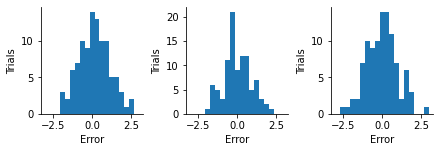

In [276]:
nRows=1
nCols=3
axesRowSize,axesColSize = defaultAxesSize() # so you always use the same size, but don't have to remember it.
fig = plt.figure(figsize=(nCols*axesColSize,nRows*axesRowSize), constrained_layout=True) # figsize = (width,height)
spec = gridspec.GridSpec(nrows=1,ncols=1, figure = fig) # a 1x1 GridSpec
showSeveralHistograms(spec,fig)

Now we can easily create a more complex figure without having to worry about the details relatives to each plot.

We can focus on the overall organization of the figure.

### Trick to speed up figure generation when using helper functions with GridSpec or Axes as arguments

If generating a complexe figure is taking a lot of time, make sure you are not generating GridSpec objects without a reason.

* If your helper function does not need to create subdivisions (additional GridSpec objects), it should take an axes as argument. 
* If your helper function is creating subplots or needs to be able to create new GridSpec objects, it should take a GridSpec as argument. 

With very complexe figure, try using helper function with axes as argument whenever possible.

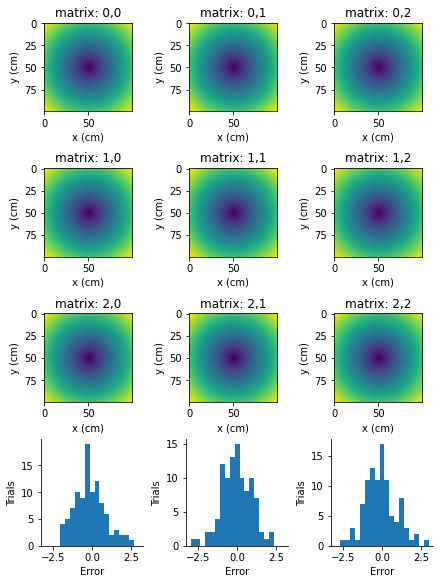

In [277]:
nRows=4
nCols=3
axesRowSize,axesColSize = defaultAxesSize() # so you always use the same size, but don't have to remember it.
fig = plt.figure(figsize=(nCols*axesColSize,nRows*axesRowSize), constrained_layout=True) # figsize = (width,height)
spec = gridspec.GridSpec(nrows=2,ncols=1, figure = fig, height_ratios=[3,1]) # a 2x1 GridSpec. First row is the size of 3 Axes.

specMatrices = gridspec.GridSpecFromSubplotSpec(nrows=1,ncols=1,subplot_spec=spec[0])
specHist = gridspec.GridSpecFromSubplotSpec(nrows=1,ncols=1,subplot_spec=spec[1])

showSeveralMatrices(specMatrices,fig)
showSeveralHistograms(specHist,fig)


## Adding letters to identify figure panels (or axes)

In figures for scientific publications, you want to add letters to refer to the different parts of the figure. For example, in our figure we have the part with the matrices and the part with the histogram. 

The letters are normally placed at the top-left extreme of each part. 

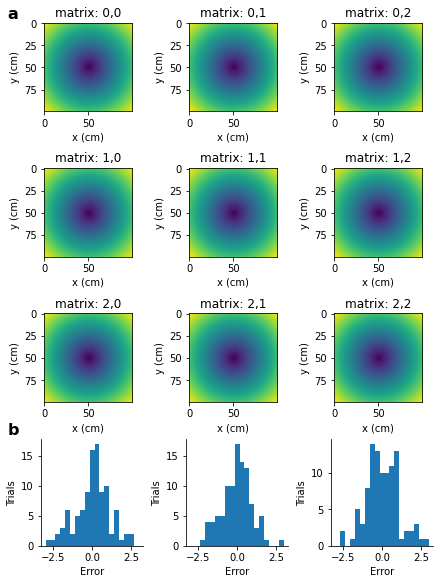

In [278]:
nRows=4
nCols=3
axesRowSize,axesColSize = defaultAxesSize() # so you always use the same size, but don't have to remember it.
fig = plt.figure(figsize=(nCols*axesColSize,nRows*axesRowSize), constrained_layout=True) # figsize = (width,height)

wholeFigSpec=gridspec.GridSpec(nrows=1,ncols=1, figure = fig) # 1x1 GridSpec covering whole figure
spec = gridspec.GridSpecFromSubplotSpec(nrows=2,ncols=1,subplot_spec= wholeFigSpec[0], height_ratios=[3,1]) 
# a 2x1 GridSpec. First row is the size of 3 Axes.

# GridSpec to pass to our plotting helper functions
specMatrices = gridspec.GridSpecFromSubplotSpec(nrows=1,ncols=1,subplot_spec=spec[0])
specHist = gridspec.GridSpecFromSubplotSpec(nrows=1,ncols=1,subplot_spec=spec[1])

showSeveralMatrices(specMatrices,fig)
showSeveralHistograms(specHist,fig)

# add letters
ax = fig.add_subplot(wholeFigSpec[0])
ax.text(-0.0, 1.0, "a", ha="center", va="center", transform=ax.transAxes, fontsize=16, color="black",weight="bold")
ax.text(-0.0, 0.26, "b", ha="center", va="center",  transform=ax.transAxes,fontsize=16, color="black",weight="bold")
ax.axis("off")

plt.show()

To be able to have a and b as the elements in the figures that are the highest and further to the left, we can create space with a tiny row at the top and tiny column on the left side of the figure.


Here is the code to see how we use a tiny row at the top and tiny column on the left side to make extra space for our letter. 
We will put an Axes in all cell of the GridSpec so that you can see the tiny row and tiny column.

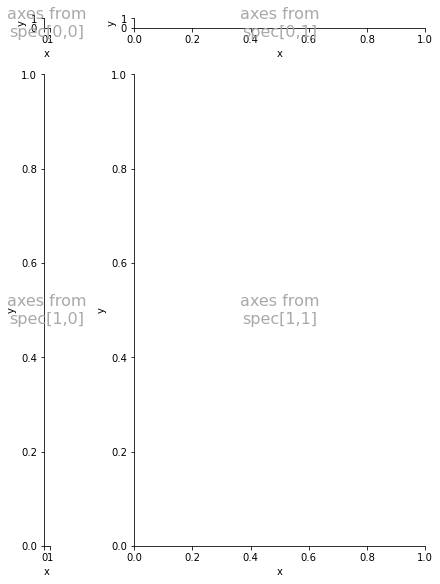

In [279]:
nRows=4
nCols=3
axesRowSize,axesColSize = defaultAxesSize() # so you always use the same size, but don't have to remember it.
fig = plt.figure(figsize=(nCols*axesColSize,nRows*axesRowSize), constrained_layout=True) # figsize = (width,height)

wholeFigSpec=gridspec.GridSpec(nrows=1,ncols=1, figure = fig) 
# 1x1 GridSpec covering whole figure, use to put the letter on the figure


wholeFigWithMarginSpec=gridspec.GridSpecFromSubplotSpec(nrows=2,ncols=2, subplot_spec=wholeFigSpec[0],
                                                        height_ratios=[0.02,1],width_ratios=[0.02,1]) 
# 2x2 GridSpec covering whole figure, first colomn and first row are tiny 
# No plot will appear in the first colomn and first row.

ax = fig.add_subplot(wholeFigWithMarginSpec[0,0])
annotate_axes(ax, 'axes from\nspec[0,0]')

ax = fig.add_subplot(wholeFigWithMarginSpec[0,1])
annotate_axes(ax, 'axes from\nspec[0,1]')

ax = fig.add_subplot(wholeFigWithMarginSpec[1,0])
annotate_axes(ax, 'axes from\nspec[1,0]')


ax = fig.add_subplot(wholeFigWithMarginSpec[1,1])
annotate_axes(ax, 'axes from\nspec[1,1]')

Now similar code but with our matrices and histogram.

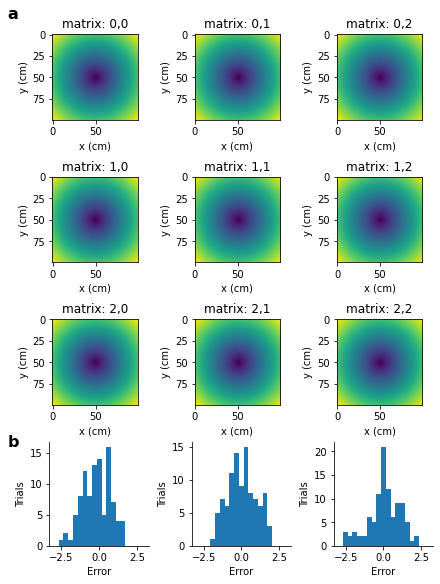

In [280]:
nRows=4
nCols=3
axesRowSize,axesColSize = defaultAxesSize() # so you always use the same size, but don't have to remember it.
fig = plt.figure(figsize=(nCols*axesColSize,nRows*axesRowSize), constrained_layout=True) # figsize = (width,height)

wholeFigSpec=gridspec.GridSpec(nrows=1,ncols=1, figure = fig) 
# 1x1 GridSpec covering whole figure, use to put the letter on the figure


wholeFigWithMarginSpec=gridspec.GridSpecFromSubplotSpec(nrows=2,ncols=2, subplot_spec=wholeFigSpec[0],
                                                        height_ratios=[0.02,1],width_ratios=[0.02,1]) 
# 2x2 GridSpec covering whole figure, first colomn and first row are tiny 
# No plot will appear in the first colomn and first row.


spec = gridspec.GridSpecFromSubplotSpec(nrows=2,ncols=1,subplot_spec= wholeFigWithMarginSpec[1,1], height_ratios=[3,1]) 
# A 2x1 GridSpec. First row is the size of 3 Axes, Second row is the size of 1 Axes
# We made spec from wholeFigWithMarginSpec[1,1], that is why it does not plot in the first row and first column.


# GridSpec to pass to our plotting helper functions
specMatrices = gridspec.GridSpecFromSubplotSpec(nrows=1,ncols=1,subplot_spec=spec[0])
specHist = gridspec.GridSpecFromSubplotSpec(nrows=1,ncols=1,subplot_spec=spec[1])

# Function doing the plotting
showSeveralMatrices(specMatrices,fig)
showSeveralHistograms(specHist,fig)

# add letters with coordinates relative to the entire figure
ax = fig.add_subplot(wholeFigSpec[0])
ax.text(-0.0, 1.0, "a", ha="center", va="center", transform=ax.transAxes, fontsize=16, color="black",weight="bold")
ax.text(-0.0, 0.24, "b", ha="center", va="center",  transform=ax.transAxes,fontsize=16, color="black",weight="bold")
ax.axis("off")

plt.show()

Now a is the highest element in the figure and a and b are the elements that are the further to the left.

## rc parameters